In [1]:
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time


## Load data with necessary transformations

In [2]:
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
)

In [3]:
from torchvision import datasets

# get the data
trainset = datasets.MNIST(
    root = 'data',
    train = True,
    download = True, 
    transform = transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size = 64,
    shuffle = True
)
testset = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = transform
)
testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size = 64,
    shuffle = False
)

## View data and batches

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


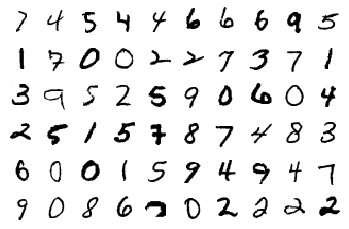

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Define neural network and move computation to GPU

### Neural network architecture

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        ## define the layers
        self.linear1 = nn.Linear(28*28, 200)    # input layer to 200 nodes
        self.linear2 = nn.Linear(200, 200) 
        self.linear3 = nn.Linear(200,10)        # 200 nodes to 10 output nodes
    
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        return F.log_softmax(x, dim=1)

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Net().to(device)
print(net)

Net(
  (linear1): Linear(in_features=784, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=200, bias=True)
  (linear3): Linear(in_features=200, out_features=10, bias=True)
)


In [12]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Train model

In [13]:
def train(net):
    start = time.time()
    for epoch in range(10): # no. of epochs
        running_loss = 0.0
        for i, (images, labels) in enumerate(trainloader):  
            # Move tensors to the configured device
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = net(images)
            loss = criterion(outputs, labels)

            # Backprpagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Loss: {:.4f}' 
                       .format(epoch+1, 10, loss.item()))
    end = time.time()
    print('Done Training')
    print('%0.2f minutes' %((end - start) / 60))
    
train(net)

Epoch [1/10], Loss: 2.1990
Epoch [1/10], Loss: 2.1298
Epoch [1/10], Loss: 1.9024
Epoch [1/10], Loss: 1.6779
Epoch [1/10], Loss: 1.4796
Epoch [1/10], Loss: 1.3517
Epoch [1/10], Loss: 1.0751
Epoch [1/10], Loss: 0.9246
Epoch [1/10], Loss: 0.9820
Epoch [2/10], Loss: 0.7235
Epoch [2/10], Loss: 0.6836
Epoch [2/10], Loss: 0.5246
Epoch [2/10], Loss: 0.4872
Epoch [2/10], Loss: 0.7881
Epoch [2/10], Loss: 0.6047
Epoch [2/10], Loss: 0.5186
Epoch [2/10], Loss: 0.5461
Epoch [2/10], Loss: 0.5301
Epoch [3/10], Loss: 0.2931
Epoch [3/10], Loss: 0.4381
Epoch [3/10], Loss: 0.3472
Epoch [3/10], Loss: 0.4693
Epoch [3/10], Loss: 0.6947
Epoch [3/10], Loss: 0.6188
Epoch [3/10], Loss: 0.4719
Epoch [3/10], Loss: 0.6711
Epoch [3/10], Loss: 0.5645
Epoch [4/10], Loss: 0.4450
Epoch [4/10], Loss: 0.4267
Epoch [4/10], Loss: 0.7119
Epoch [4/10], Loss: 0.5137
Epoch [4/10], Loss: 0.6801
Epoch [4/10], Loss: 0.4204
Epoch [4/10], Loss: 0.4291
Epoch [4/10], Loss: 0.7528
Epoch [4/10], Loss: 0.5925
Epoch [5/10], Loss: 0.5505
E

## Validate model

In [14]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 85.84 %


In [ ]:
torch.__version__